#Vježbe 3 - Grupiranje

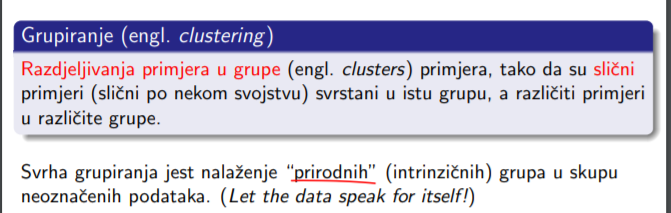

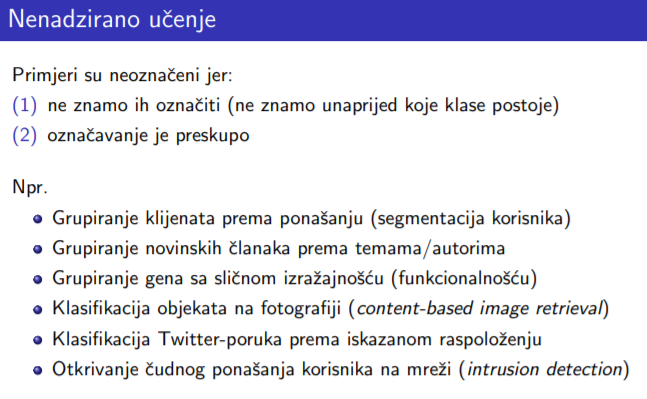

##Grupiranje particioniranjem, k-means

Objašenjenje grupiranja particioniranjem pomoću odabira mjesta za dostavu pizza od 3:40 na
[poveznici](https://www.youtube.com/watch?v=QXOkPvFM6NU).

###Definiranje podataka

Definiranje 100 točaka u kordinatnom sustavu
* definiramo varijablu podaci u koju cemo spremiti random brojeve
* točke spremamo u dvije dimenzije za prikaz za x i y osi


In [1]:
#definiranje podataka tako da je vidljivo koliko bi klustera trebalo biti
import numpy as np
import matplotlib.pyplot as plt
podaci = np.random.uniform(0,50, size=(100,2))
podaci[35:60] += 60
podaci[61:] += 130

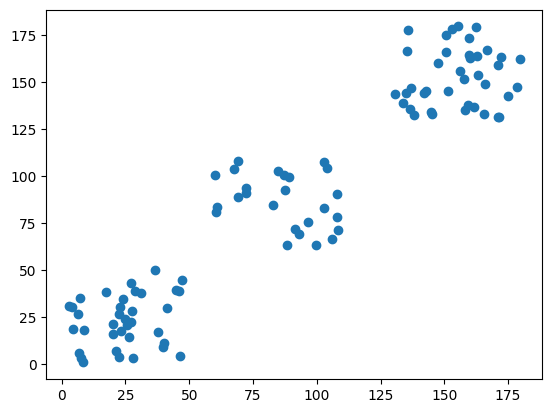

In [17]:
#prikaz svih točaka
plt.scatter(podaci[:,0], podaci[:,1])

### Primjena k-means algoritma: [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [3]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3, random_state=42,n_init=1)


* Parametar ***n_init*** u K-means algoritmu odnosi se na broj puta koliko će se algoritam pokrenuti s različitim početnim centroidima.
    *  Postavljanjem n_init na veći broj, npr. ***n_init=10***, algoritam će se pokrenuti 10 puta s različitim početnim centroidima, a rezultati će se usporediti.




In [18]:
#treniranje da dobijemo centroide
kmeans.fit(podaci)

KMeans(n_clusters=3, n_init=1, random_state=42)

In [23]:
#dohvačanje podataka o centroidima
centroidi=kmeans.cluster_centers_

In [24]:
#predviđamo grupu na temelju centroida
#predict dodjeljuje svakoj točki kojem klasteru(grupi) pripada
grupa=kmeans.predict(podaci)

###Grafički prikaz rezultata

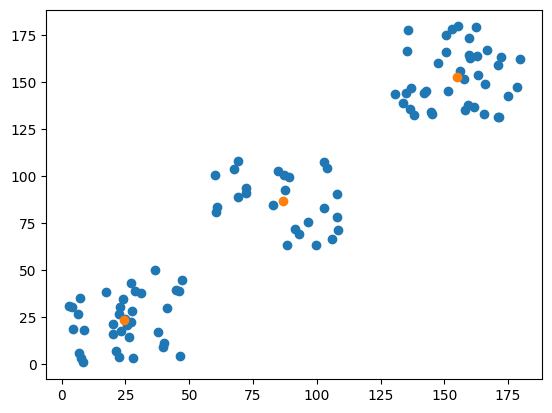

In [25]:
#definiramo po čemu želimo promjenu boje!!!
plt.scatter(podaci[:,0], podaci[:,1])
plt.scatter(centroidi[:,0], centroidi[:,1])
plt.show()

**Predviđanje za neku željenu vrijednost**

In [12]:
kmeans.predict([[297,103]])

array([1], dtype=int32)

### Metode evaluacije


Obzirom da se radi o nenadziranom učenju, jedini način da interpretiramo/validiramo naše rezultate je pomoću njihove vizualizacije.  - [Clustering Visualizers](https://www.scikit-yb.org/en/latest/api/cluster/index.html)



#### Elbow metod (mean distortion) - [KElbowVisualizer](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)

Izračunava se suma srednjih kvadratnih udaljenosti dobivenih od svake točke do njenog najbližeg centroida.



*   Ako graf izgleda kao ljudska ruka, onda "lakat", odnosno točka pregiba na krivulji predstavlja najbolju vrijednost za odabir broja klastera.





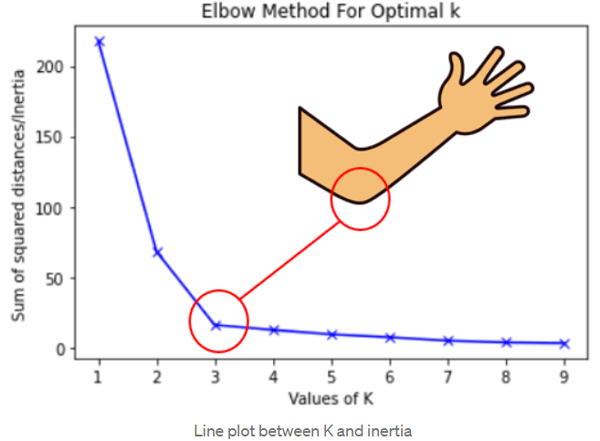

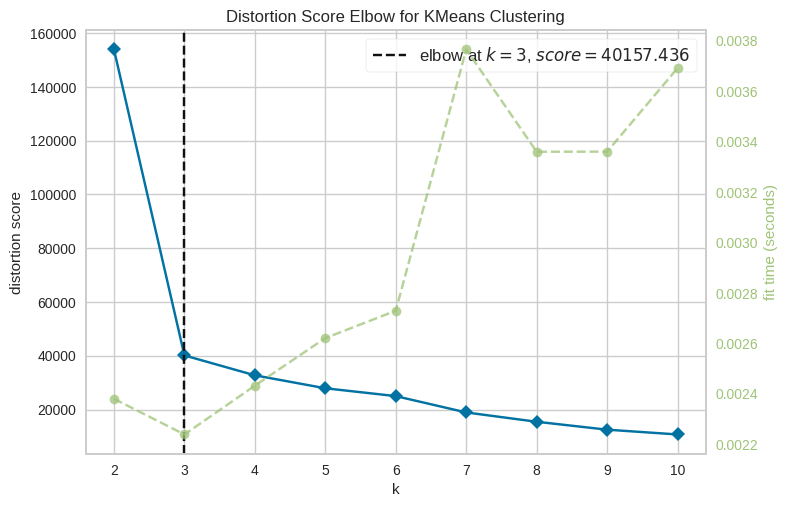

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans, k=(2,11))

visualizer.fit(podaci)        # Fit the data to the visualizer
visualizer.show()

# u zelenoj boji nam se prikazuje vrijeme potrebno za treniranje modela

####Silhouette


 Služi za mjerenje koliko je objekt sličan klasteru kojem pripada, u usporedbi s drugim klasterima.

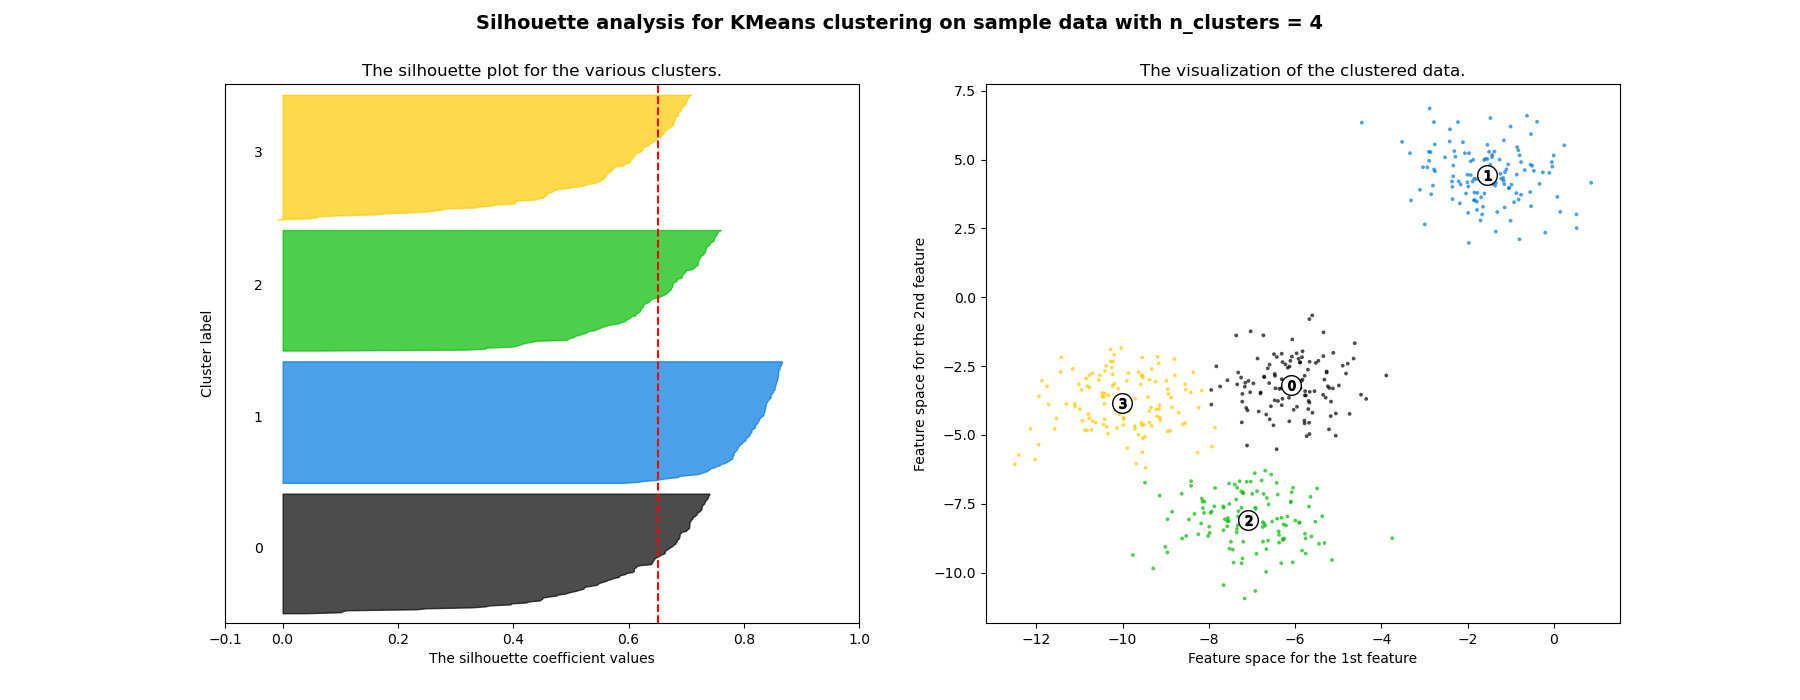

Računa se za svaku točku po formuli:


**Silhouette Coefficient** = (x-y)/ max(x,y)


* y - srednja udaljenost do svih drugih točaka u istom klasteru
* x - srednja udaljenost do točaka u najbližem susjednom klasteru

Interpretacija vrijednosti:
* Vrijednosti blizu +1 prikazuju da točka jako udaljena od njabližeg susjednog klastera
* Vrijednosti oko 0 prikazuju da je točka na granici kojem bi klasteru trebala pripadati
* Vrijednosti koje teže prema -1, odnosno negativne vrijednosti, znače da je točka možda dodijeljena u krivi klaster.

**Silhoutte Score**: prikazuje nam srednju vrijednost svih koeficijenata

The Python Sklearn package supports the following different methods for evaluating Silhouette scores.

* [silhouette_score](https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) (sklearn.metrics) for the data set is used for measuring the mean of the Silhouette Coefficient for each sample belonging to different clusters.
* [silhouette_samples](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html) (sklearn.metrics) provides the Silhouette scores for each sample of different clusters.

In [29]:
from sklearn import metrics
score = metrics.silhouette_score(podaci, grupa)

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.708


#####Score za više klastera


Za crtanje siluete i grafički prikaz rezultata za više klustera/grupa od Skearna:

[Selecting the number of clusters with silhouette analysis on KMeans clustering](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)


In [38]:
#izračunavanje najvećeg scora za razlicit broj klastera, radi odabira najbolje podjele
#dopuniti kod
def vise_klustera(a,b,podaci):
  from sklearn.cluster import KMeans
  from sklearn import metrics
  from yellowbrick.cluster import SilhouetteVisualizer

  max_score=0
  broj_klastera=0
  scores_po_broju=[]
  broj_klustera_po_broju=[]

  for i in range(a, b+1):
    kmeans=KMeans(n_clusters=i, random_state=42,n_init=1)
    grupa=kmeans.fit_predict(podaci)
    score = metrics.silhouette_score(podaci, grupa)
    print('Silhouetter Score za {} klastera iznosi:{}'.format(i, '%.3f' % score))

    scores_po_broju.append(score)
    broj_klustera_po_broju.append(i)

    if score > max_score:
      max_score = score
      broj_klastera = i

  print('Najveći score imamo sa {} klastera i iznosi {}'.format
        (broj_klastera,'%.3f' % max_score))

  plt.plot(broj_klustera_po_broju,scores_po_broju)
  plt.show()


Silhouetter Score za 2 klastera iznosi:0.648
Silhouetter Score za 3 klastera iznosi:0.708
Silhouetter Score za 4 klastera iznosi:0.579
Silhouetter Score za 5 klastera iznosi:0.428
Silhouetter Score za 6 klastera iznosi:0.421
Najveći score imamo sa 3 klastera i iznosi 0.708


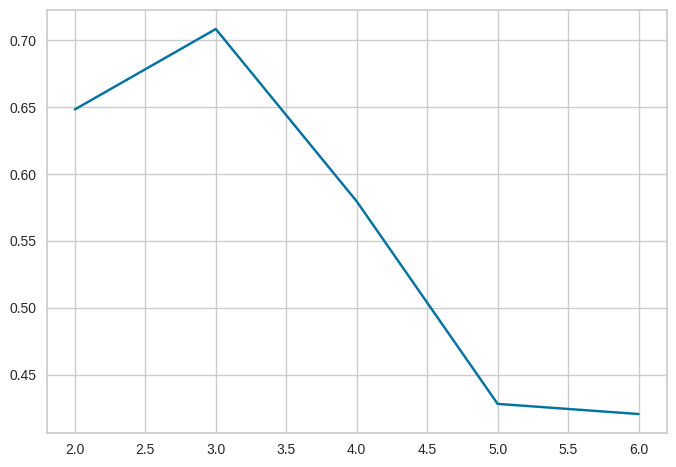

In [39]:
vise_klustera(2,6,podaci)

#####[Silhouette Visualizer](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html)

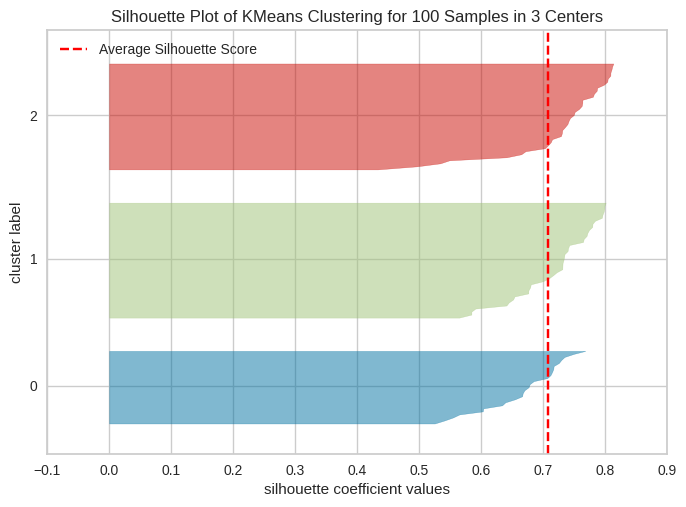

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 100 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [40]:
# vrijednosti u blizini +1 označavanju veliku udaljenost,
#vrijednosti blizu -1 označavaju da su podaci možda dodjeljeniu krivi klaster/grupu
from yellowbrick.cluster import SilhouetteVisualizer
kmeans = KMeans(n_clusters=3, random_state=42, n_init=1)
visualizer=SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(podaci)
visualizer.show()


## Primjena grupiranja: segmentacija slike

In [42]:
from matplotlib.image import imread
image = imread('/content/konj1.jpg')
image.shape

(334, 500, 3)

Mijenjamo oblik slike: visina,sirina, dubina u  visina x sirina,dubina , kako bi dobili 3D vektor za slike u boji  (prije smo radili sa sivim slikama)

In [43]:
#X = image.reshape(167000, 3)  # da nam pokaze rgb oblik za svaki piksel
#X = image.reshape(image.shape[0]*image.shape[1], image.shape[2])
X = image.reshape(-1, 3)
X.shape

(167000, 3)

In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#definiramo kmeans model za 3 boje (dobivene centroide)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=1)

In [51]:
#oznaka grupe/klastera za svaki piksel
kmeans.fit(X)
kmeans.predict(X)


array([1, 1, 1, ..., 0, 0, 2], dtype=int32)

In [47]:
#dohvaćanje centroida (imamo 3 vrijednosti za svaki piksel - za svaku boju)
kmeans.cluster_centers_

array([[ 78.14798976,  52.90882419,  24.85049355],
       [ 59.36812336, 158.15073269, 249.49138567],
       [172.16353292, 134.44595157,  79.69784223]])

In [48]:
kmeans.cluster_centers_[kmeans.labels_]

array([[ 59.36812336, 158.15073269, 249.49138567],
       [ 59.36812336, 158.15073269, 249.49138567],
       [ 59.36812336, 158.15073269, 249.49138567],
       ...,
       [172.16353292, 134.44595157,  79.69784223],
       [172.16353292, 134.44595157,  79.69784223],
       [ 78.14798976,  52.90882419,  24.85049355]])

In [49]:
#dodjeljivanje vrijednosti piksela centroida svim ostalim pikselima obzirom na klastere/grupe
segmented_img=kmeans.cluster_centers_[kmeans.labels_]

In [52]:
#vrijednosti ne mogu biti decimalne, mogu biti integer (0-255) ili float (0-1)
segmented_img = segmented_img.astype(int)

In [53]:
#kako bi prikazali sliku moramo ju vratiti u početni format
slika_boje = segmented_img.reshape(image.shape)

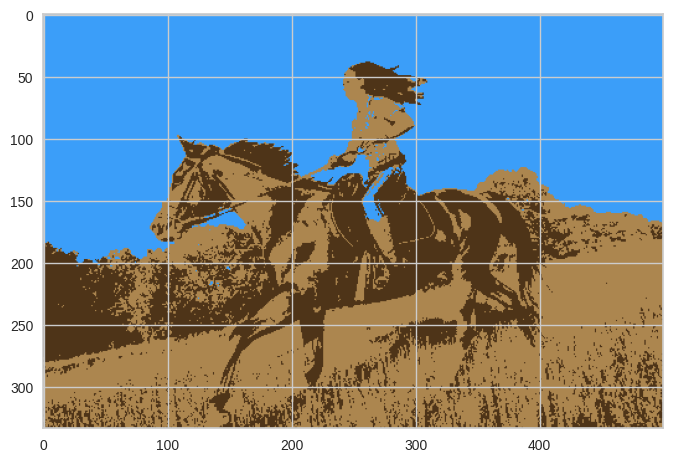

In [54]:
plt.imshow(slika_boje)

In [57]:
#for petlja kojom ćemo prikazati slike sa 10,8,6,4 i 2 boje

segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
  kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=1).fit(X)
  seg_img = kmeans.cluster_centers_[kmeans.labels_]
  seg_img = seg_img.astype(int)
  segmented_imgs.append(seg_img.reshape(image.shape))

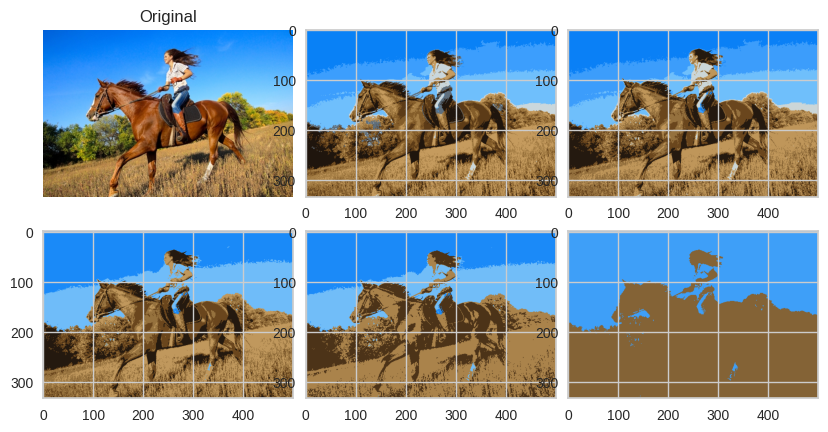

In [59]:
#vizualizacija: na prvoj poziciji je original pa ostale
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)  #2,3,1  #redak, stupac,pozicija
plt.imshow(image)
plt.title("Original")
plt.axis('off')

for i, n in enumerate(n_colors):
  plt.subplot(232 + i)
  plt.imshow(segmented_imgs[i])
plt.show()

## Iris flower dataset
Probati primjeniti algoritam na iris flower dataset. Koliki broj klustera bi odabrali po podacima siluete, a koliko po elblow metodi?


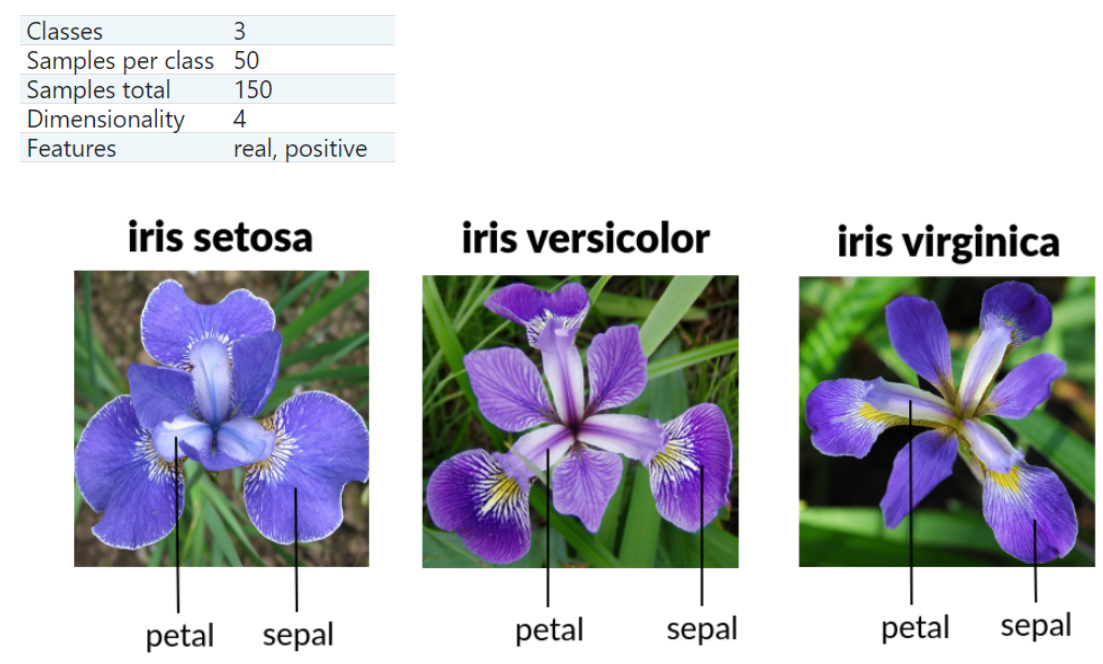

### Scikit-Learn

Postoje mnoge Python bibliotke koje nude implementaciju različitih algoritama strojnog učenja (eng. Machine Learning). Jedan od najpoznatijih je  [Scikit-Learn](http://scikit-learn.org) paket koji ima jako dobru dokumentaciju. Ima gotove baze podataka koje se mogu koristiti. [Popis baza](https://scikit-learn.org/stable/datasets.html)

In [55]:
from sklearn import datasets
baza_sklearn=datasets.load_iris()
podaci=baza_sklearn.data


###Seaborn

[Seaborn](http://seaborn.pydata.org) je biblioteka za vizualizaciju podataka temeljena na matplotlibu. Nudi sučelje visoke razine za crtanje statističkih grafova.
Ima gotove baze podataka koje se mogu koristiti. [Popis baza](https://github.com/mwaskom/seaborn-data)

In [56]:
import seaborn as sns
baza_seaborn = sns.load_dataset('iris')
baza_seaborn

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


##Segmentacija kupaca

**Primjer:** [Customer Segmentation Using K-Means Clustering](https://medium.com/mlearning-ai/customer-segmentation-using-k-means-clustering-ae73e3d82934)

**Baza podataka**: [Mall Customer Segmentation Data
](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)
